1. Importing Datasets
2. Data Cleaning
3. Visulalizing pairplots
4. Building Artificial Neural Networks
5. Making submission file

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
train = pd.read_csv("flight_delays_train.csv")
train.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N


Understanding the dataset, and confirming that any incorrect value does not exist in it by checking with total number of months etc.

In [5]:
for col in train.columns:
    uni = train[col].nunique()
    print("Columns: ",col," ","Unique Values: ",uni)

Columns:  Month   Unique Values:  12
Columns:  DayofMonth   Unique Values:  31
Columns:  DayOfWeek   Unique Values:  7
Columns:  DepTime   Unique Values:  1300
Columns:  UniqueCarrier   Unique Values:  22
Columns:  Origin   Unique Values:  289
Columns:  Dest   Unique Values:  289
Columns:  Distance   Unique Values:  1310
Columns:  dep_delayed_15min   Unique Values:  2


Checking for null values in dataset

In [6]:
train.isnull().sum().sort_values()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
UniqueCarrier        0
Origin               0
Dest                 0
Distance             0
dep_delayed_15min    0
dtype: int64

The dataset has no null value

In [7]:
test = pd.read_csv("flight_delays_test.csv")

Removing the alphabets from Day, Month and Week columns

In [8]:
def clean_alpha(df):
    df.Month = df.Month.str.extract(r"(\d+)")
    df.DayofMonth = df.DayofMonth.str.extract(r"(\d+)")
    df.DayOfWeek = df.DayOfWeek.str.extract(r"(\d+)")


clean_alpha(train)
clean_alpha(test)
train.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,N
1,4,20,3,1548,US,PIT,MCO,834,N
2,9,2,5,1422,XE,RDU,CLE,416,N


Encoding all the alphabets based data into numbers

In [9]:
label_encoding = LabelEncoder()
def encode(df):
    df['UniqueCarrier'] = label_encoding.fit_transform(df['UniqueCarrier'])
    df['Origin'] = label_encoding.fit_transform(df['Origin'])
    df['Dest'] = label_encoding.fit_transform(df['Dest'])

encode(train)
train['dep_delayed_15min'] = label_encoding.fit_transform(train['dep_delayed_15min'])
#Writing this seperately since, dep_delayed_15min column is not present in test dataframe


encode(test)
train.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,0,18,78,732,0
1,4,20,3,1548,18,217,171,834,0
2,9,2,5,1422,20,228,59,416,0


In [10]:
X = train.drop(['dep_delayed_15min'],axis=1)
y = train['dep_delayed_15min']

In [11]:
train.shape

(100000, 9)

Understanding the pairplot between all the parameters with dep_delayed_15min

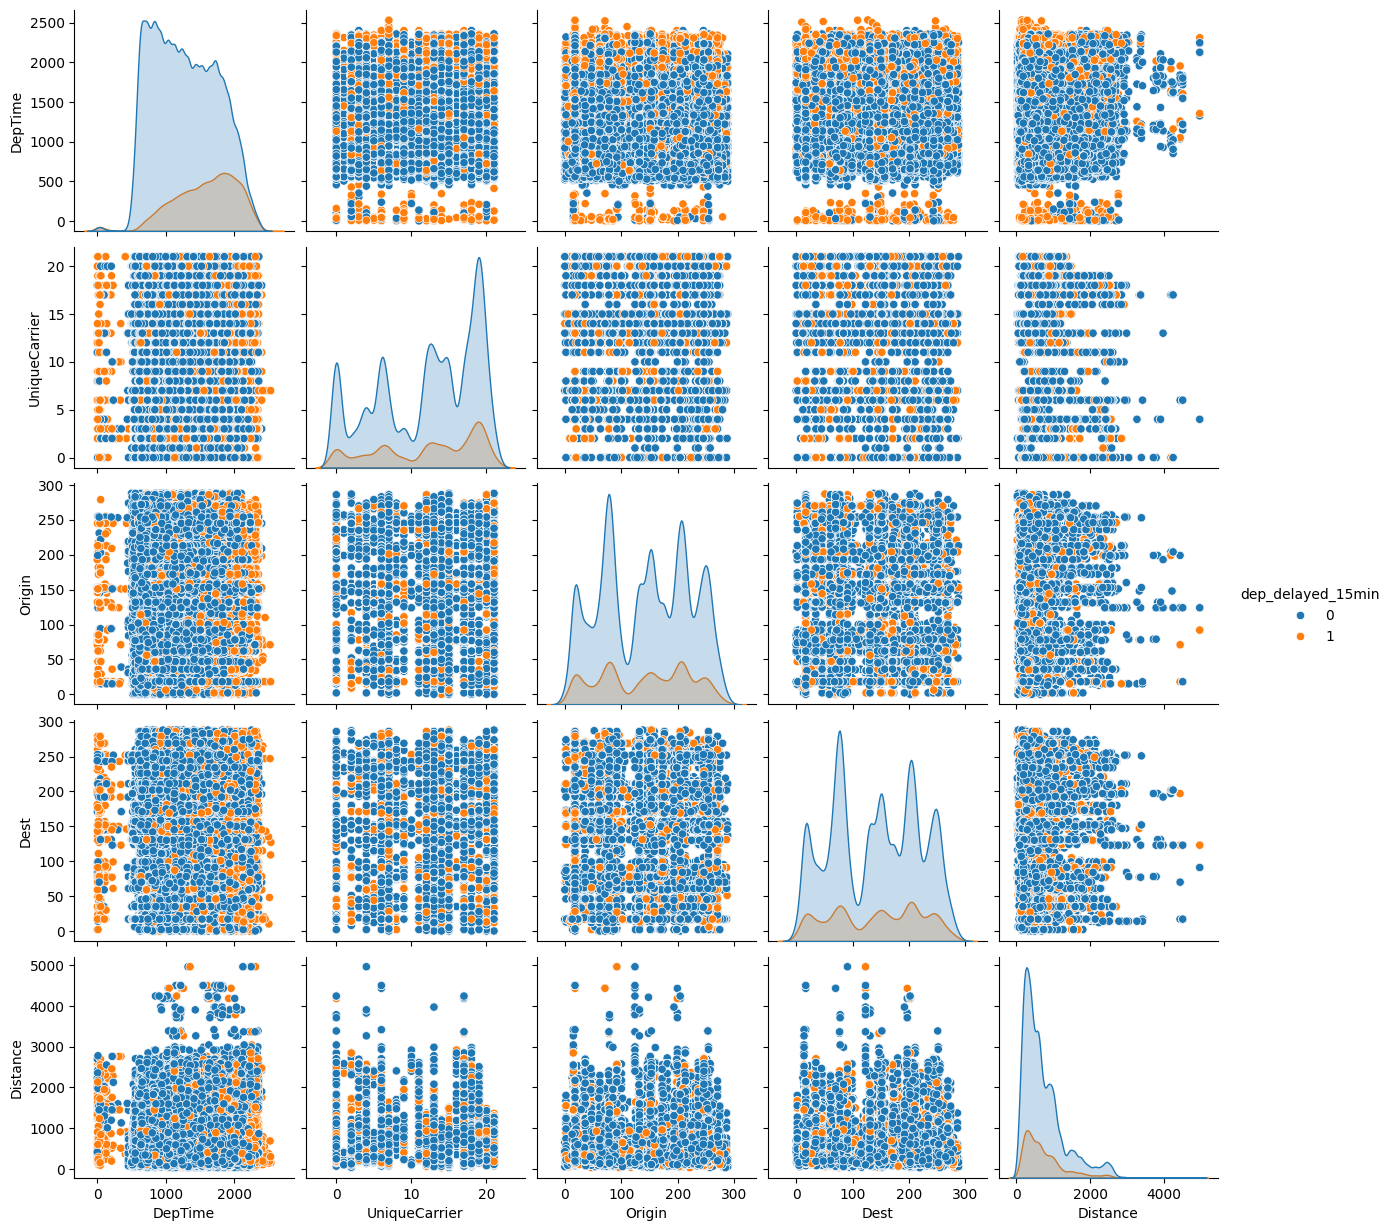

In [12]:
sns.pairplot(train,hue = 'dep_delayed_15min')

Now the pairplot clearly insit that any linear classification will be useless, because of high overlaps. ALgortihms like RandomForestRegressor will be efficient. However, in this notebook we will stick towards developing Artificial Neural Network

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.fit_transform(test)

After scaling the data we can feed this into a deep leaning model

In [14]:
model = None
model = keras.Sequential([
    layers.Input(shape = (8,)),
    layers.Dense(64,activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(64,activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(1,activation = 'sigmoid')
])


model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit(X_scaled,y,epochs = 6,batch_size = 64,validation_split = 0.25,shuffle = True)

Epoch 1/6
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8013 - loss: 0.4812 - val_accuracy: 0.8089 - val_loss: 0.4573
Epoch 2/6
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8075 - loss: 0.4623 - val_accuracy: 0.8091 - val_loss: 0.4559
Epoch 3/6
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8076 - loss: 0.4590 - val_accuracy: 0.8090 - val_loss: 0.4545
Epoch 4/6
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8090 - loss: 0.4576 - val_accuracy: 0.8094 - val_loss: 0.4537
Epoch 5/6
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8096 - loss: 0.4553 - val_accuracy: 0.8092 - val_loss: 0.4534
Epoch 6/6
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8113 - loss: 0.4525 - val_accuracy: 0.8102 - val_loss: 0.4524


In [16]:
pred = model.predict(test_scaled)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


Score will be around 0.69

In [17]:
pred = pred.flatten()
sub = pd.Series(pred,name = 'dep_delayed_15min')
sub = sub.reset_index()
sub.columns = ['id', 'dep_delayed_15min']
sub.to_csv("sub.csv",index = False)
sub.head()

,id,dep_delayed_15min
0,0,0.084034
1,1,0.115044
2,2,0.055014
3,3,0.234893
4,4,0.181793


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load datasets
train = pd.read_csv("flight_delays_train.csv")
test = pd.read_csv("flight_delays_test.csv")

# Data exploration and cleaning
for col in train.columns:
    print(f"Column: {col}, Unique Values: {train[col].nunique()}")

# Checking for null values
print(train.isnull().sum().sort_values())

# Remove alphabets from Day, Month, and Week columns
def clean_alpha(df):
    df['Month'] = df['Month'].str.extract(r"(\d+)").astype(int)
    df['DayofMonth'] = df['DayofMonth'].str.extract(r"(\d+)").astype(int)
    df['DayOfWeek'] = df['DayOfWeek'].str.extract(r"(\d+)").astype(int)

clean_alpha(train)
clean_alpha(test)

# Encoding categorical variables
label_encoding = LabelEncoder()

def encode(df):
    df['UniqueCarrier'] = label_encoding.fit_transform(df['UniqueCarrier'])
    df['Origin'] = label_encoding.fit_transform(df['Origin'])
    df['Dest'] = label_encoding.fit_transform(df['Dest'])

encode(train)
train['dep_delayed_15min'] = label_encoding.fit_transform(train['dep_delayed_15min'])
encode(test)

# Splitting features and target
X = train.drop(['dep_delayed_15min'], axis=1)
y = train['dep_delayed_15min']

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test)

# Define the model
def build_model(num_layers, units, dropout_rate, learning_rate):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_scaled.shape[1],)))
    
    for _ in range(num_layers):
        model.add(layers.Dense(units=units, activation='relu'))
        model.add(layers.Dropout(rate=dropout_rate))
        
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Example hyperparameters to try
hyperparameters = [
    {'num_layers': 2, 'units': 128, 'dropout_rate': 0.3, 'learning_rate': 0.001},
    {'num_layers': 3, 'units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.0001},
    {'num_layers': 1, 'units': 256, 'dropout_rate': 0.4, 'learning_rate': 0.01},
    # Add more hyperparameter sets to try
]

best_score = 0
best_hyperparams = None

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for params in hyperparameters:
    cv_scores = []
    for train_index, val_index in kf.split(X_scaled):
        X_train, X_val = X_scaled[train_index], X_scaled[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model = build_model(**params)
        early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)
        
        val_predictions = model.predict(X_val).flatten()
        val_predictions = (val_predictions > 0.5).astype(int)
        accuracy = accuracy_score(y_val, val_predictions)
        cv_scores.append(accuracy)
    
    mean_cv_score = np.mean(cv_scores)
    if mean_cv_score > best_score:
        best_score = mean_cv_score
        best_hyperparams = params

print(f'Best Hyperparameters: {best_hyperparams}')
print(f'Best Cross-Validation Accuracy: {best_score:.4f}')

# Training final model on entire dataset with best hyperparameters
model = build_model(**best_hyperparams)
model.fit(X_scaled, y, epochs=50, batch_size=64, validation_split=0.25, shuffle=True, callbacks=[early_stopping])

# Prediction on test data
pred = model.predict(test_scaled).flatten()

# Create submission file
sub = pd.DataFrame({'id': range(len(pred)), 'dep_delayed_15min': pred})
sub.to_csv("sub.csv", index=False)
sub.head()
